In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt



## 1. Đọc ảnh và chuyển về gray

In [3]:
def showImage(image,isgray = True):
    if isgray is False:
        plt.imshow(image[:,:,::-1]); plt.axis("off")
    else:
        plt.imshow(image,cmap="gray"); plt.axis("off")
    

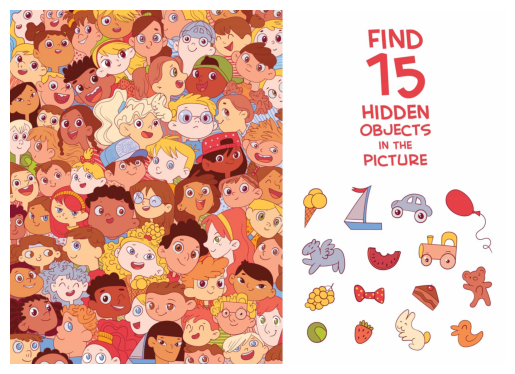

In [4]:
image_path = "1.jpg"
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
showImage(image,False)

## 2 Cắt ảnh thành các template

(-0.5, 139.5, 119.5, -0.5)

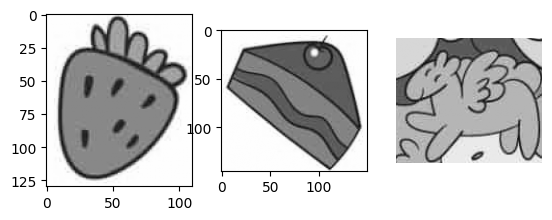

In [5]:
image_gray = gray_image[0:,0:1410]
image = image[0:,0:1410]
ice = gray_image[900:1150,1470:1650]
boat = gray_image[900:1150,1670:1950]
car = gray_image[900:1120,1950:2200]
balloon = gray_image[900:1100,2220:2500]
horse = gray_image[1180:1370,1500:1730]
watermelon = gray_image[1150:1380,1810:2020]
train = gray_image[1120:1380,2050:2320]
grape = gray_image[1400:1580,1500:1680]
tie = gray_image[1400:1540,1700:1980]
cake = gray_image[1410:1555,2070:2220]
bear = gray_image[1300:1570,2300:2500]
tenis = gray_image[1590:1750,1500:1680]
strawberry = gray_image[1600:1730,1770:1880]
cat = gray_image[1520:1770,1930:2200]
duck = gray_image[1550:1750,2230:2480]
hourse2 = gray_image[1280:1400,190:330]
templates = [ice,boat,car,balloon,horse,watermelon,train,grape,tie,cake,bear,tenis,strawberry,cat,duck]
name = ["ice","boat","car","balloon","horse","watermelon","train","grape","tie","cake","bear","tenis","strawberry","cat","duck"]
plt.subplot(1,3,1)
plt.imshow(strawberry,cmap='gray')
plt.subplot(1,3,2)
plt.imshow(cake,cmap="gray")
plt.subplot(1,3,3)
plt.imshow(tenis,cmap="gray")
plt.axis('off')
plt.imshow(gray_image[1280:1400,190:330],cmap="gray")
plt.axis('off')

## 3 Làm mượt và phát hiện cạnh

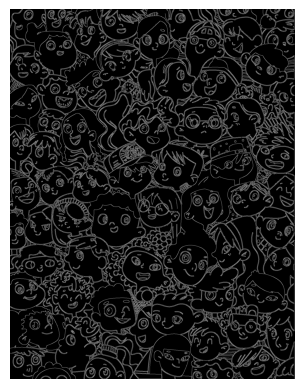

In [6]:
def blur_and_edges(image):
    image = cv2.GaussianBlur(image, (3, 3), 1.5)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    image = clahe.apply(image)

    edges = cv2.Canny(image, 50, 150)
    edges = cv2.normalize(edges, None, 0, 255, cv2.NORM_MINMAX)
    return edges

image_edges = blur_and_edges(image_gray)
showImage(image_edges)

## 4 Template matching


0.4 0.14444389939308167 (943, 1620)
0.45 0.1457395851612091 (734, 220)
0.5 0.14743581414222717 (1018, 1221)
0.7 0.2061513513326645 (593, 1355)


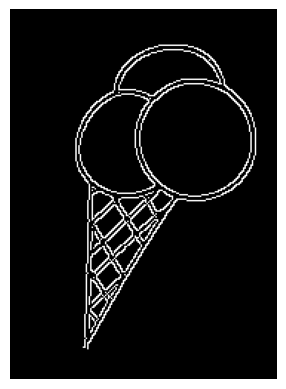

In [7]:
import numpy as np
def template_matching(image_edges,template_edges):
    scales = np.arange(0.4,2,0.05)  # Ví dụ
    best_val = -1
    best_loc = None
    best_scale = None
   
    for scale in scales:
        # Resize template
        new_w = int(template_edges.shape[1] * scale)
        new_h = int(template_edges.shape[0] * scale)
        resized_template = cv2.resize(template_edges, (new_w, new_h))
        # matchTemplate
        result = cv2.matchTemplate(image_edges, resized_template, cv2.TM_CCOEFF_NORMED)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
        # print(max_val)
        if max_val > best_val:           
            best_val = max_val
            best_loc = max_loc
            best_scale = scale
            print(best_scale,best_val,best_loc)
    return best_loc

template_edges = blur_and_edges(ice)
showImage(template_edges)
best_loc= template_matching(image_edges,template_edges)
# Sau vòng lặp, best_loc và best_scale là vị trí và tỉ lệ khớp tốt nhất


## 5 Vẽ khung đối tượng

0.4 0.14444389939308167 (943, 1620)
0.45 0.1457395851612091 (734, 220)
0.5 0.14743581414222717 (1018, 1221)
0.7 0.2061513513326645 (593, 1355)
0.4 0.13602663576602936 (626, 1668)
0.5 0.14440371096134186 (612, 1661)
0.6 0.15793602168560028 (593, 1662)
0.6499999999999999 0.1799069344997406 (584, 1660)
0.4 0.10968877375125885 (345, 1059)
0.45 0.10977660864591599 (336, 1057)
0.5 0.1143299788236618 (1204, 226)
0.7 0.1874326467514038 (878, 50)
0.4 0.12801948189735413 (1023, 1602)
0.45 0.13251271843910217 (901, 1165)
0.5 0.13499842584133148 (255, 618)
0.6 0.1616659164428711 (263, 942)
0.4 0.09946267306804657 (1097, 1185)
0.45 0.10522294789552689 (415, 907)
0.5 0.1131928414106369 (769, 1537)
0.55 0.16288186609745026 (198, 1291)
0.6 0.290701299905777 (193, 1288)
0.4 0.17657066881656647 (608, 1266)
0.5 0.2202882170677185 (206, 392)
0.4 0.10262597352266312 (1247, 252)
0.7 0.2140493243932724 (1044, 1445)
0.4 0.15758079290390015 (815, 847)
0.7 0.21417944133281708 (676, 1086)
0.4 0.15218760073184967

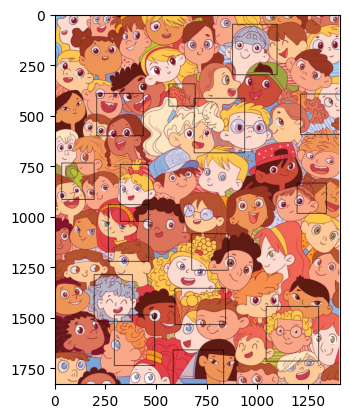

In [8]:
def draw_frame(best_loc,template_edges,image):
    top_left = best_loc
    h, w = template_edges.shape[:2]
    bottom_right = (top_left[0] + h , top_left[1] + w)

    # Vẽ rectangle
    image_draw = cv2.rectangle(image, top_left, bottom_right, (0, 0, 0), 2)
    cv2.imwrite("out.jpg",image_draw)
    # Hiển thị ảnh kết quả
    plt.imshow(image_draw[:,:,::-1])

for tem in templates:
    draw_frame(template_matching(image_edges,blur_and_edges(tem)),tem,image)